<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/Lab2_2348561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/customer_shopping_data.csv.zip")

In [3]:
df.head(25)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Handling missing values

In [5]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
bins =[0,2,5,10,14,17,30,60,100]
labels =['infant','toddler','younger child','older child','teenager','young adult','adult','old']
df['Age Category']=pd.cut(df['age'],bins,labels=labels)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Age Category
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,young adult
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,young adult
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,young adult
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,old
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,adult


In [8]:
numeric_data=df[['age','quantity','price']]
categorical_data=df[['gender', 'category','payment_method','shopping_mall','customer_id','invoice_no']]

In [9]:
numeric_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [10]:
numeric_data.corr()

,age,quantity,price
age,1.000000,0.000667,0.001694
quantity,0.000667,1.000000,0.344880
price,0.001694,0.344880,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_data.columns:
  le=LabelEncoder()
  categorical_data[col]=le.fit_transform(categorical_data[col])

In [12]:
categorical_data.head()

,gender,category,payment_method,shopping_mall,customer_id,invoice_no
0,0,1,1,4,44140,12165
1,1,4,2,2,3630,67813
2,1,1,0,6,52143,8722
3,0,4,1,7,99029,23002
4,0,0,0,4,27838,74054


In [13]:
from sklearn.feature_selection import chi2
X=categorical_data.drop(columns=['category'])
Y=categorical_data['category']

In [14]:
chi_scores=chi2(X,Y)
chi_scores

(array([4.52609899e+00, 2.40788944e+00, 2.43807592e+00, 1.79793269e+05,
        1.03102085e+05]),
 array([0.71757228, 0.93387193, 0.93168738, 0.        , 0.        ]))

<Axes: >

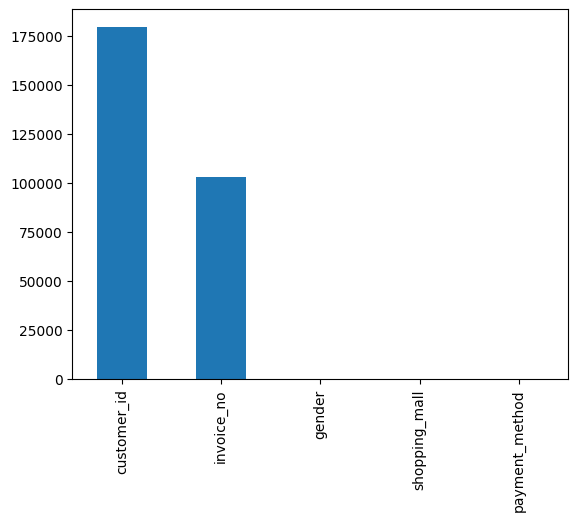

In [15]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

In [16]:
data = np.array([df.quantity,df.price])

cov_matrix = np.cov(data, bias=True)
print(cov_matrix)

[[1.99661995e+00 4.58657109e+02]
 [4.58657109e+02 8.85819483e+05]]


<Axes: >

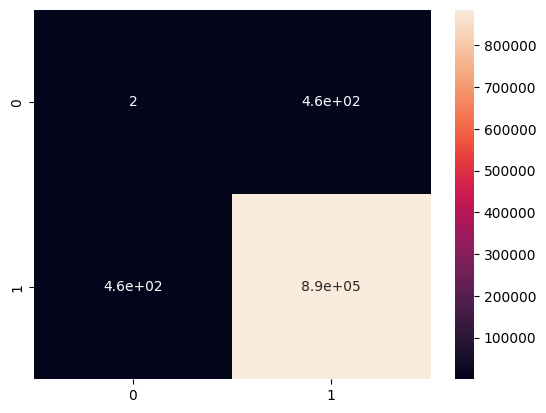

In [17]:
sns.heatmap(cov_matrix,annot=True)

In [21]:
from scipy.stats import ttest_ind
group1 = df[df['gender']=='Male']
group2 = df[df['gender']=='Female']

In [22]:
a = ttest_ind(group1['quantity'], group2['quantity'])
pvalue = a[1]
pvalue

0.9669270866604878

In [ ]:
alpha=0.05
if pvalue<=alpha:
  print('Null hypothesis is rejected,the difference in group means is zero')
else:
    print('Null hypothesis cannoot be rejected,the difference in group means is different from zero')

Null hypothesis cannoot be rejected,the difference in group means is different from zero
